# 1 Import reuqired packages

Import BRAINformat and other required packages

In [54]:
from brain.dataformat.brainformat import BrainDataFile
from brain.dataformat.base import RelationshipAttribute
from brain.dataformat.base import ManagedObject
from brain.dataformat.spec import BaseSpec, RelationshipSpec
from brain.tools.convert_rat_data import ConvertRatData

# Import basic python packages
from pandas import DataFrame as df
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import time
import json
from scipy.stats import zscore

# Pandas plot spreadheet settings
from IPython.display import display
display_pd_max_rows = 35 # maximum number of rows to be shown in pandas table display. Set to None to show all.

# setup logging (used mainly during data convert)
import logging
logging.captureWarnings(True)
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers[0].stream = sys.stdout  # Avoid the red background when logging basic status data (not errors)

# setup matplotlib for inline use with SVG rendering and set save dir
#%matplotlib inline
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'
savefig_dir = "/Users/oruebel/Documents/02_Papers/2016_BRAINformat_Frontiers_in_Neuroinformatics/frontiers_in_neuroinformatics/sources/use_case_data_description/plots"

def mpl_stop_interact(fig):
    """Stop interaction on the given matplotlib figure"""
    plt.gcf().canvas.draw()
    time.sleep(0.25)
    plt.close(fig)

# 2 Convert the rat data 

In [55]:
filename = '/Volumes/Data Drive/brain_R18_B12_Tone.h5'

In [56]:
log_convert_settings=False  # Don't print the settings again since we see them here and to keep the output more compact

if not os.path.exists(filename):
    pn1 = 'Preprocessed dataset where the raw voltage signal is decomposed using a ' + \
          'Wavelet transformation to isolate the activity of 54 different frequencies ' + \
          'logarithmically spaced between 4 and 1200Hz. This dataset is also downsampled ' + \
          'to 3200Hz. The Common Average Reference was calculated and subtracted from each ' + \
          'channel. This is an important indication because it affects what type of analysis can be performed.'
    pn2 = 'Preprocessed dataset where the raw voltage signal is decomposed using a Wavelet ' + \
          'transformation to isolate the activity of 1 frequency logarithmically spaced between ' +  \
          '70 and 170Hz. This dataset is also downsampled to 3200Hz. The Common Average Reference ' +  \
          'was calculated and subtracted from each channel. This is an important indication because ' + \
          'it affects what type of analysis can be performed.'
    pn3 = 'Preprocessed dataset where the raw voltage signal is decomposed using a Wavelet ' + \
          'transformation to isolate the activity of 1 frequency logarithmically spaced between ' + \
          '70 and 170Hz. This dataset is also downsampled to 3200Hz. The Common Average Reference ' +  \
          'was calculated and subtracted from each channel. This is an important indication because ' + \
          'it affects what type of analysis can be performed.'
    pn4 = 'Preprocessed dataset derived from the wavelet decomposed data by taking the high-gamma bands 65-170hz' + \
          'and computing their median and z-scoring the results.'
             
    # Create the object to perform the conversion
    convert_obj = ConvertRatData(
        raw_dirs=['/Volumes/Data Drive/brain/R18_B12/RawHTK',],
        stimulus_trigger_mark='/Volumes/Data Drive/brain/R18_B12/mrk11.htk',
        stimulus_type="Tone",
        stimulus_amplitude='/Volumes/Data Drive/brain/R18_B12/stimA.htk',
        stimulus_frequency='/Volumes/Data Drive/brain/R18_B12/stimF.htk',
        stimulus_signal='/Volumes/Data Drive/brain/Stimulus/stimulus_signal_03202013.wav',
        stimulus_audio='/Volumes/Data Drive/brain/R18_B12/aud11.htk',
        stimulus_trigger='/Volumes/Data Drive/brain/Stimulus/stimulus_trigger_03202013.wav',
        stimulus_amplitude_processed='/Volumes/Data Drive/brain/R18_B12/stimA_400Hz.mat',
        stimulus_frequency_processed='/Volumes/Data Drive/brain/R18_B12/stimF_400Hz.mat',
        stimulus_trigger_mark_processed='/Volumes/Data Drive/brain/R18_B12/mrk11_400Hz.mat',
        surgical_notes_dir='/Volumes/Data Drive/brain/SurgicalNotes/RAT18',
        grid_geometry_image='/Volumes/Data Drive/brain/Geometry/64ch_layout.png',
        grid_orientation='R',
        processed_dirs=['/Volumes/Data Drive/brain/R18_B12/Wvlt_4to1200_54band_CAR1',
                        '/Volumes/Data Drive/brain/R18_B12/Wvlt_70to170_1band',
                        '/Volumes/Data Drive/brain/R18_B12/MUA',
                        '/Volumes/Data Drive/brain/R18_B12/Wvlt_4to1200_54band_CAR1_zHG'],
        bands_files=['/Volumes/Data Drive/brain/cfs.4_1200.54Wvl.mat', 
                     'guess', 
                     '[1200,]', 
                     '[170,]', ],
        processed_notes=[pn1, pn2, pn3, pn4],
        output=filename)
    # Show the settings used for conversion
    convert_obj.print_status = False
    if log_convert_settings:
        convert_obj.log_settings()
    # Convert the data
    outfile = convert_obj.convert()
    # Close the created output file
    if outfile:
        outfile.close()
        del outfile
        print "Conversion complete!"

# 3 Basic overview of the file content 

In [57]:
infile = BrainDataFile(filename, mode='r') # Open the file we just generated

In [58]:
object_stats = infile.file_stats(root='/') # Compile the file content statistics for the fil

In [59]:
# Show basic object statistics
print 'Number of datasets: ' + str(len(object_stats['datasets']))
print 'Number of groups: ' + str(len(object_stats['groups']))
print 'Number of managed objects: ' + str(len(object_stats['managed']))
print 'Number of regular attributes: ' + str(len(object_stats['attributes']))
print 'Number of relationship attributes: ' + str(len(object_stats['relationships']))

Number of datasets: 73
Number of groups: 23
Number of managed objects: 42
Number of regular attributes: 372
Number of relationship attributes: 522


## 3.1 Managed Objects
Provide an overview of all managed object stored in the file:

In [60]:
managed_df = df({'name': object_stats['managed'],
                 'type': [ManagedObject.get_managed_object(infile[i]).__class__.__name__
                          for i in object_stats['managed']]})
with pd.option_context('display.max_rows', display_pd_max_rows):
    display(managed_df)

name  \
0                                               /data   
1                                      /data/external   
2                           /data/external/stimulus_0   
3        /data/external/stimulus_0/stimulus_amplitude   
4   /data/external/stimulus_0/stimulus_amplitude_p...   
5            /data/external/stimulus_0/stimulus_audio   
6        /data/external/stimulus_0/stimulus_frequency   
7   /data/external/stimulus_0/stimulus_frequency_p...   
8           /data/external/stimulus_0/stimulus_signal   
9          /data/external/stimulus_0/stimulus_trigger   
10    /data/external/stimulus_0/stimulus_trigger_mark   
11  /data/external/stimulus_0/stimulus_trigger_mar...   
12                                     /data/internal   
13                        /data/internal/collection_0   
14           /data/internal/collection_0/ephys_data_0   
15  /data/internal/collection_0/ephys_data_process...   
16  /data/internal/collection_0/ephys_data_process...   
..                                                ...   
25                                       /descriptors   
26                               /descriptors/dynamic   
27                                /descriptors/static   
28                   /descriptors/static/instrument_0   
29   /descriptors/static/instrument_0/64ch_layout.png   
30                   /descriptors/static/instrument_1   
31  /descriptors/static/instrument_1/polytrode_to_...   
32  /descriptors/static/instrument_1/polytrode_to_...   
33                 /descriptors/static/surgical_notes   
34        /descriptors/static/surgical_notes/IMG_2740   
35        /descriptors/static/surgical_notes/IMG_2741   
36        /descriptors/static/surgical_notes/IMG_2742   
37        /descriptors/static/surgical_notes/IMG_2746   
38        /descriptors/static/surgical_notes/IMG_2748   
39        /descriptors/static/surgical_notes/IMG_2749   
40           /descriptors/static/surgical_notes/RAT18   
41                                                  /   

                                   type  
0                         BrainDataData  
1                 BrainDataExternalData  
2                     BrainDataStimulus  
3              BrainDataMetadataDataset  
4              BrainDataMetadataDataset  
5              BrainDataMetadataDataset  
6              BrainDataMetadataDataset  
7              BrainDataMetadataDataset  
8              BrainDataMetadataDataset  
9              BrainDataMetadataDataset  
10             BrainDataMetadataDataset  
11             BrainDataMetadataDataset  
12                BrainDataInternalData  
13                  BrainDataCollection  
14                       BrainDataEphys  
15              BrainDataEphysProcessed  
16              BrainDataEphysProcessed  
..                                  ...  
25                 BrainDataDescriptors  
26          BrainDataDynamicDescriptors  
27           BrainDataStaticDescriptors  
28  BrainDataStaticDescriptorInstrument  
29             BrainDataMetadataDataset  
30  BrainDataStaticDescriptorInstrument  
31             BrainDataMetadataDataset  
32             BrainDataMetadataDataset  
33               BrainDataMetadataGroup  
34             BrainDataMetadataDataset  
35             BrainDataMetadataDataset  
36             BrainDataMetadataDataset  
37             BrainDataMetadataDataset  
38             BrainDataMetadataDataset  
39             BrainDataMetadataDataset  
40             BrainDataMetadataDataset  
41                        BrainDataFile  

[42 rows x 2 columns]

## 3.2 Datasets
Provide and overview of all datasets in the file:

In [61]:
dataset_df = df({'name': object_stats['datasets'],
                 'dtype': [infile[i].dtype for i in object_stats['datasets']],
                 'shape': [infile[i].shape for i in object_stats['datasets']],
                 '# Attributes': [len(infile[i].attrs) for i in object_stats['datasets']],
                 '# Relationships': [len(RelationshipAttribute.get_all_relationships(infile[i])) 
                                     for i in object_stats['datasets']],
                 'managed type': [ManagedObject.get_managed_object(infile[i]).__class__.__name__
                          for i in object_stats['datasets']]})
with pd.option_context('display.max_rows', display_pd_max_rows):
    display(dataset_df)

# Attributes  # Relationships    dtype              managed type  \
0             16                8  float32  BrainDataMetadataDataset   
1             22               14  float64  BrainDataMetadataDataset   
2              5                0  float32  BrainDataMetadataDataset   
3             16                8  float32  BrainDataMetadataDataset   
4             22               14  float64  BrainDataMetadataDataset   
5              5                0    int16  BrainDataMetadataDataset   
6              5                0    int16  BrainDataMetadataDataset   
7             16                8  float32  BrainDataMetadataDataset   
8             22               14  float64  BrainDataMetadataDataset   
9              1                0   object                  NoneType   
10            14               10    int64                  NoneType   
11            16               12  float32                  NoneType   
12             2                0  float64                  NoneType   
13            19               15  float64                  NoneType   
14             5                1  float64                  NoneType   
15            16               11  float32                  NoneType   
16             2                0  float64                  NoneType   
..           ...              ...      ...                       ...   
56             8                4    int64                  NoneType   
57            24               20  float64                  NoneType   
58             7                0    uint8  BrainDataMetadataDataset   
59            22               21    int64                  NoneType   
60             7                6  float64                  NoneType   
61             1                0   object                  NoneType   
62            11               10    int64                  NoneType   
63             4                0  float64  BrainDataMetadataDataset   
64             4                0  float64  BrainDataMetadataDataset   
65             1                0   object                  NoneType   
66             6                0    uint8  BrainDataMetadataDataset   
67             6                0    uint8  BrainDataMetadataDataset   
68             6                0    uint8  BrainDataMetadataDataset   
69             6                0    uint8  BrainDataMetadataDataset   
70             6                0    uint8  BrainDataMetadataDataset   
71             6                0    uint8  BrainDataMetadataDataset   
72             3                0   object  BrainDataMetadataDataset   

                                                 name              shape  
0        /data/external/stimulus_0/stimulus_amplitude        (18029786,)  
1   /data/external/stimulus_0/stimulus_amplitude_p...          (590805,)  
2            /data/external/stimulus_0/stimulus_audio        (72119141,)  
3        /data/external/stimulus_0/stimulus_frequency        (18029786,)  
4   /data/external/stimulus_0/stimulus_frequency_p...          (590805,)  
5           /data/external/stimulus_0/stimulus_signal       (139200000,)  
6          /data/external/stimulus_0/stimulus_trigger       (139200000,)  
7     /data/external/stimulus_0/stimulus_trigger_mark        (18029786,)  
8   /data/external/stimulus_0/stimulus_trigger_mar...          (590805,)  
9                      /data/external/stimulus_0/type                 ()  
10  /data/internal/collection_0/ephys_data_0/elect...              (64,)  
11  /data/internal/collection_0/ephys_data_0/raw_data  (64, 18029786, 1)  
12  /data/internal/collection_0/ephys_data_0/sampl...                 ()  
13  /data/internal/collection_0/ephys_data_0/time_...        (18029786,)  
14  /data/internal/collection_0/ephys_data_process...              (54,)  
15  /data/internal/collection_0/ephys_data_process...   (64, 590805, 54)  
16  /data/internal/collection_0/ephys_data_process...                 ()  
..                                                ...        

## 3.3 Groups 
Provide and overview of all groups in the file:

In [62]:
group_df = df({'name': object_stats['groups'],
               '# Attributes': [len(infile[i].attrs) for i in object_stats['groups']],
               '# Relationships': [len(RelationshipAttribute.get_all_relationships(infile[i])) 
                                  for i in object_stats['groups']],
               'managed type': [ManagedObject.get_managed_object(infile[i]).__class__.__name__
                                for i in object_stats['groups']]})
with pd.option_context('display.max_rows', display_pd_max_rows):
    display(group_df)

# Attributes  # Relationships                         managed type  \
0              3                0                        BrainDataData   
1              3                0                BrainDataExternalData   
2              7                4                    BrainDataStimulus   
3              3                0                BrainDataInternalData   
4              6                3                  BrainDataCollection   
5             10                7                       BrainDataEphys   
6              5                2              BrainDataEphysProcessed   
7              5                2              BrainDataEphysProcessed   
8              5                2              BrainDataEphysProcessed   
9              6                3              BrainDataEphysProcessed   
10             6                3                  BrainDataCollection   
11            10                7                       BrainDataEphys   
12             4                1              BrainDataEphysProcessed   
13             4                1              BrainDataEphysProcessed   
14             4                1              BrainDataEphysProcessed   
15             4                1              BrainDataEphysProcessed   
16             3                0                 BrainDataDescriptors   
17             3                0          BrainDataDynamicDescriptors   
18             3                0           BrainDataStaticDescriptors   
19             5                2  BrainDataStaticDescriptorInstrument   
20             6                3  BrainDataStaticDescriptorInstrument   
21             7                4               BrainDataMetadataGroup   
22             3                0                        BrainDataFile   

                                                 name  
0                                               /data  
1                                      /data/external  
2                           /data/external/stimulus_0  
3                                      /data/internal  
4                         /data/internal/collection_0  
5            /data/internal/collection_0/ephys_data_0  
6   /data/internal/collection_0/ephys_data_process...  
7   /data/internal/collection_0/ephys_data_process...  
8   /data/internal/collection_0/ephys_data_process...  
9   /data/internal/collection_0/ephys_data_process...  
10                        /data/internal/collection_1  
11           /data/internal/collection_1/ephys_data_0  
12  /data/internal/collection_1/ephys_data_process...  
13  /data/internal/collection_1/ephys_data_process...  
14  /data/internal/collection_1/ephys_data_process...  
15  /data/internal/collection_1/ephys_data_process...  
16                                       /descriptors  
17                               /descriptors/dynamic  
18                                /descriptors/static  
19                   /descriptors/static/instrument_0  
20                   /descriptors/static/instrument_1  
21                 /descriptors/static/surgical_notes  
22                                                  /

## 3.4 Attributes
Provide an overview of all attributes in the file:

In [63]:
attributes_df = df({'name': [a['name'] for a in object_stats['attributes']],
                    'parant': [a['parent'] for a in object_stats['attributes']],
                    'value': [a['value'] for a in object_stats['attributes']]})
with pd.option_context('display.max_rows', display_pd_max_rows):
    display(attributes_df)

name                                        parant  \
0             format_type                                         /data   
1      format_description                                         /data   
2    format_specification                                         /data   
3             format_type                                /data/external   
4      format_description                                /data/external   
5    format_specification                                /data/external   
6             format_type                     /data/external/stimulus_0   
7      format_description                     /data/external/stimulus_0   
8    format_specification                     /data/external/stimulus_0   
9             format_type  /data/external/stimulus_0/stimulus_amplitude   
10     format_description  /data/external/stimulus_0/stimulus_amplitude   
11   format_specification  /data/external/stimulus_0/stimulus_amplitude   
12                   unit  /data/external/stimulus_0/stimulus_amplitude   
13          sampling_rate  /data/external/stimulus_0/stimulus_amplitude   
14                  CLASS  /data/external/stimulus_0/stimulus_amplitude   
15                   NAME  /data/external/stimulus_0/stimulus_amplitude   
16         REFERENCE_LIST  /data/external/stimulus_0/stimulus_amplitude   
..                    ...                                           ...   
355    format_description   /descriptors/static/surgical_notes/IMG_2748   
356  format_specification   /descriptors/static/surgical_notes/IMG_2748   
357                 CLASS   /descriptors/static/surgical_notes/IMG_2748   
358         IMAGE_VERSION   /descriptors/static/surgical_notes/IMG_2748   
359        IMAGE_SUBCLASS   /descriptors/static/surgical_notes/IMG_2748   
360           format_type   /descriptors/static/surgical_notes/IMG_2749   
361    format_description   /descriptors/static/surgical_notes/IMG_2749   
362  format_specification   /descriptors/static/surgical_notes/IMG_2749   
363                 CLASS   /descriptors/static/surgical_notes/IMG_2749   
364         IMAGE_VERSION   /descriptors/static/surgical_notes/IMG_2749   
365        IMAGE_SUBCLASS   /descriptors/static/surgical_notes/IMG_2749   
366           format_type      /descriptors/static/surgical_notes/RAT18   
367    format_description      /descriptors/static/surgical_notes/RAT18   
368  format_specification      /descriptors/static/surgical_notes/RAT18   
369           format_type                                             /   
370    format_description                                             /   
371  format_specification                                             /   

                                                 value  
0                                        BrainDataData  
1    Managed group for storage of brain data (inter...  
2    {"prefix": null, "datasets": {}, "group": "dat...  
3                                BrainDataExternalData  
4    Managed group for storage of external data rel...  
5    {"relationships": [], "datasets": {}, "group":...  
6                                    BrainDataStimulus  
7              Group stroing metadata about a stimulus  
8    {"relationships": [], "datasets": {"type": {"r...  
9                             BrainDataMetadataDataset  
10                            Metadata storage dataset  
11   {"relationships": [], "dimensions": [], "datas...  
12                                                Volt  
13                                               12207  
14                                     DIMENSION_SCALE  
15                                                Volt  
16   [[<HDF5 object reference>, 1], [<HDF5 object r...  
..                                                 ...  
355                           Metadata storage dataset  
356  {"relationships": [], "dimensions": [], "datas...  
357                                              IMAGE  
358                                                1.2  
359      

## 3.5 Relationships

Here we provide an overview of all relationships in a file. From the list of relationships specification we have from the file stats, we can easily create RelationshipAttribute instances for all relationships in our file

In [64]:
allrels = []
for i, v in enumerate(object_stats['relationships']):
    cr = RelationshipAttribute(parent_object=infile[v['parent']],
                               relationship_spec=BaseSpec.from_json(v['value']))
    allrels.append(cr)

Create a Pandas dataframe with a basic overview of all our relationships

In [65]:
relationships_df = df({'name': [i['name'].lstrip('RELATIONSHIP_ATTR_') for i in object_stats['relationships']],
    'parent': [i['parent'] for i in object_stats['relationships']],
    'relationship' : [BaseSpec.from_json(i['value'])['relationship_type'] for i in object_stats['relationships']],
    'target': [BaseSpec.from_json(i['value'])['target'] for i in object_stats['relationships']],
    'value' : [i['value'] for i in object_stats['relationships']]}
  )
#display(relationships_df.describe())
with pd.option_context('display.max_rows', display_pd_max_rows):
    display(relationships_df)

name  \
0    user_recording_/data/external/stimulus_0_/data...   
1    user_recording_/data/external/stimulus_0_/data...   
2    user_recording_/data/external/stimulus_0_/data...   
3    user_recording_/data/external/stimulus_0_/data...   
4    order_/data/external/stimulus_0/stimulus_ampli...   
5    order_/data/external/stimulus_0/stimulus_ampli...   
6    order_/data/external/stimulus_0/stimulus_ampli...   
7    order_/data/external/stimulus_0/stimulus_ampli...   
8    order_/data/external/stimulus_0/stimulus_ampli...   
9    order_/data/external/stimulus_0/stimulus_ampli...   
10   shared_encoding_/data/external/stimulus_0/stim...   
11   order_/data/external/stimulus_0/stimulus_ampli...   
12   order_/data/external/stimulus_0/stimulus_ampli...   
13   order_/data/external/stimulus_0/stimulus_ampli...   
14   order_/data/external/stimulus_0/stimulus_ampli...   
15   order_/data/external/stimulus_0/stimulus_ampli...   
16   order_/data/external/stimulus_0/stimulus_ampli...   
..                                                 ...   
505  user_recording_/descriptors/static/instrument_...   
506  user_recording_/descriptors/static/instrument_...   
507                         polytrode_to_grid_location   
508  indexes_/descriptors/static/instrument_1/layou...   
509  indexes_/descriptors/static/instrument_1/layou...   
510  indexes_/descriptors/static/instrument_1/layou...   
511  indexes_/descriptors/static/instrument_1/layou...   
512  indexes_/descriptors/static/instrument_1/layou...   
513  indexes_/descriptors/static/instrument_1/layou...   
514  indexes_/descriptors/static/instrument_1/layou...   
515  indexes_/descriptors/static/instrument_1/layou...   
516  indexes_/descriptors/static/instrument_1/layou...   
517  indexes_/descriptors/static/instrument_1/layou...   
518  user_surgical_notes/descriptors/static/surgica...   
519  user_surgical_notes/descriptors/static/surgica...   
520  user_surgical_notes/descriptors/static/surgica...   
521  user_surgical_notes/descriptors/static/surgica...   

                                                parent     relationship  \
0                            /data/external/stimulus_0             user   
1                            /data/external/stimulus_0             user   
2                            /data/external/stimulus_0             user   
3                            /data/external/stimulus_0             user   
4         /data/external/stimulus_0/stimulus_amplitude            order   
5         /data/external/stimulus_0/stimulus_amplitude            order   
6         /data/external/stimulus_0/stimulus_amplitude            order   
7         /data/external/stimulus_0/stimulus_amplitude            order   
8         /data/external/stimulus_0/stimulus_amplitude            order   
9         /data/external/stimulus_0/stimulus_amplitude            order   
10        /data/external/stimulus_0/stimulus_amplitude  shared_encoding   
11        /data/external/stimulus_0/stimulus_amplitude            order   
12   /data/external/stimulus_0/stimulus_amplitude_p...            order   
13   /data/external/stimulus_0/stimulus_amplitude_p...            order   
14   /data/external/stimulus_0/stimulus_amplitude_p...            order   
15   /data/external/stimulus_0/stimulus_amplitude_p...            order   
16   /data/external/stimulus_0/stimulus_amplitude_p...            order   
..                                                 ...              ...   
505                   /descriptors/static/instrument_1             user   
506                   /descriptors/static/instrument_1             user   
507                   /descriptors/static/instrument_1             user   
508      /descriptors/static/instrument_1/layout_index          indexes   
509      /descriptors/static/instrument_1/layout_index          indexes   
510      /descriptors/static/instrument_1/layout_index          indexes   
511      /descriptors/static/instrument_1/layout_index          indexes   
512      /d

# 4 Plot the file hierarchy and object relationships

## 4.1 Setup the NetworkX graph datastructures

In [66]:
G = nx.Graph() # nx.MultiDiGraph()
# Add all nodes
for d in object_stats['datasets']:
    G.add_node(d)

for g in object_stats['groups']:
    G.add_node(g)

# Create edges from relationships
relationship_edges = {i:[] for i in RelationshipSpec.RELATIONSHIP_TYPES}
for e in allrels:
    relationship_edges[e.relationship_type].append((e.source.name, e.target.name))
    G.add_edge(e.source.name, e.target.name)
    
# Create edges from the file hierarchy
relationship_edges['managed_by'] = []
allnodes = (object_stats['datasets'] + object_stats['groups'])
for n in allnodes:
    for p in allnodes:
        if os.path.dirname(n) == p and n != p:
            relationship_edges['managed_by'].append((n,p))
            G.add_edge(n,p) 

In [67]:
# Print the basic statistics about the graph
print "Number of datasets: " + str(len(object_stats['datasets']))
print "Number of groups: " + str(len(object_stats['groups']))
print "Number of managed objects: " + str(len(object_stats['managed']))
print "Number of regular attributes: " + str(len(object_stats['attributes']))
print "Number of relationship attributes: " + str(len(object_stats['relationships']))
print ""
print "Edge Types (%i)" % (np.sum([len(v) for v in relationship_edges.values()]))
print "----------------"
relationship_counts = {}
for i, v in relationship_edges.iteritems():
    relationship_counts[i] = len(v)
    print i, len(v)

Number of datasets: 73
Number of groups: 23
Number of managed objects: 42
Number of regular attributes: 372
Number of relationship attributes: 522

Edge Types (617)
----------------
shared_encoding 31
indexes_values 0
equivalent 0
indexes 25
managed_by 95
user 66
shared_ascending_encoding 89
order 311


## 4.2 Define the graph plotting function

In [68]:
def draw_graph(G, 
               pos, 
               show_labels=True,
               node_size=800, 
               edgetypes=None, 
               figsize=None, 
               label_offset=None,
               label_font_size=8,
               xlim=None,
               ylim=None,
               legend_location='lower left',
               axis_on=False,
               relationship_counts=None):
    """
    Helper function used to render the file hierarchy and the inter-object relationships
    
    :param G: The networkx graph
    :param pos: Dict with the position for each node generated, e.g., via nx.shell_layout(G)
    :param show_lables: Boolean indicating whether we should show the names of the nodes
    :param node_size: Size of the nodes
    :param edgetype: List of edge types that should be rendered. If None, then all edges will be rendered.
    :param figsize: The size of the matplotlib figure
    :param lable_offset: Tuple with the (x,y) offset for the text lables (default=None)
    :param label_font_size: Font size for the lables
    :param xlim: The x limits to be used for the plot
    :param ylim: The y limits to be used for the plot
    :param legend_locations: The legend location (e.g., 'upper left' , 'lower right')
    :param axis_on: Boolean indicating whether the axes should be turned on or not.
    :param relationship_counts: Dict with the number of occurances of each relationship or None
    
    """
    figsize = figsize if figsize is not None else (12,12)
    fig = plt.figure(figsize=figsize)
    # Draw the nodes of the network
    unmanaged_datasets = set(object_stats['datasets']) - set(object_stats['managed'])
    nx.draw_networkx_nodes(G,pos,
                           nodelist= unmanaged_datasets,
                           node_color='gray',
                           node_shape='o',
                           node_size=node_size,
                           alpha=0.7,
                           font_family='STIXGeneral',
                           label='Dataset (%i)' % len(unmanaged_datasets) )
    # All groups in the rat data are managed so we don't need to handle unmanged groups sparately
    nx.draw_networkx_nodes(G,pos,
                           nodelist= object_stats['groups'],
                           node_color='r',
                           node_shape='o',
                           node_size=node_size,
                           font_family='STIXGeneral',
                           alpha=1.0,
                           label='Managed Group (%i)' % len(object_stats['groups']))
    # Overplot the dataset nodes that are in fact managed datasets
    managed_datasets = set(object_stats['datasets']) & set(object_stats['managed'])
    nx.draw_networkx_nodes(G,pos,
                           nodelist= managed_datasets,
                           node_color='cyan',
                           node_shape='o',
                           node_size=node_size,
                           font_family='STIXGeneral',
                           alpha=1.0,
                           label='Managed Dataset (%i)' % len(managed_datasets))

    # Draw the network edges
    rel_colors = {'shared_encoding': 'steelblue',
                  'indexes_values': 'cyan',
                  'equivalent': 'gray',
                  'indexes': 'orange',
                  'user': 'green',
                  'shared_ascending_encoding': 'blue',
                  'order': 'red',
                  'managed_by': 'black'}
    # nx.draw_networkx_edges(G, pos)
    for i, v in relationship_edges.iteritems():
        if edgetypes is None or i in edgetypes:
            nx.draw_networkx_edges(G,
                                   pos,
                                   edgelist=v, 
                                   width=1.0,
                                   alpha=0.9 if i != 'managed_by' else 0.3, 
                                   edge_color=rel_colors[i],
                                   label=i if relationship_counts is None else (i+' (%i)' % relationship_counts[i] )
                                   )

    if show_labels:
        # Create node lables
        labels={i:os.path.basename(i) if len(os.path.basename(i)) > 0 else i for i in allnodes}  
        # Determine lable positions
        if label_offset is not None:
            label_pos = {k: (v+label_offset) for k, v in pos.iteritems()}
        else:
            label_pos = pos 
        # Draw the labels
        nx.draw_networkx_labels(G,label_pos,labels,font_size=label_font_size)

    if axis_on:
        plt.axis('on')
    else:
        plt.axis('off')
    plt.legend(prop={'size': label_font_size}, loc=legend_location)
    plt.autoscale(True)
    plt.tight_layout()
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.show()
    return fig

## 4.3 Plot the file hiearchy

Tree-layout showing the hierarchy of the HDF5 groups and HDF5 datasets in the file.

<IPython.core.display.Javascript object>


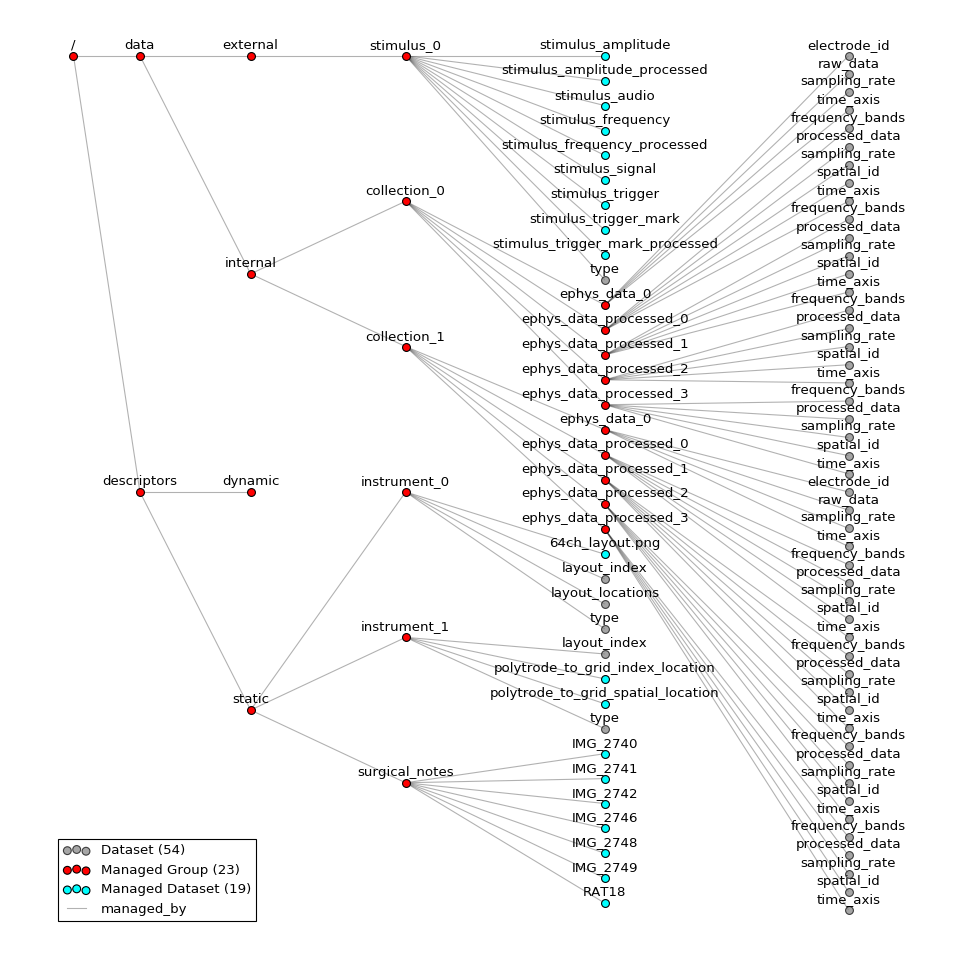

In [69]:
pos_hierarchy = {}
nodes_at_level = {i:0 for i in range(7)}
for v in allnodes:
    xpos = len(v.split('/')) if v != '/' else 1
    nodes_at_level[xpos] += 1

curr_nodes_at_level = {i:0 for i in range(7)}
for i, v in enumerate(np.sort(allnodes)):
    xpos = len(v.split('/')) if v != '/' else 1
    ypos = 1 - float(curr_nodes_at_level[xpos]) / nodes_at_level[xpos] * 1
    curr_nodes_at_level[xpos] += 1
    pos_hierarchy[v] = np.asarray([np.power(xpos,2),ypos])
fig = draw_graph(G,
                pos_hierarchy, 
                show_labels=True, 
                node_size=50, 
                edgetypes=['managed_by'], 
                label_offset=(0, 0.012), 
                label_font_size=12,
                figsize=(12,12),
                xlim=(0,40),
                ylim=(0,1.04))
if savefig_dir is not None:
    plt.savefig(os.path.join(savefig_dir, 'rat_data_file_hierarchy.pdf'))
mpl_stop_interact(fig)

## 4.4 Plot the file hierachy with relationships

Tree-layout showing the hierarchy of the HDF5 groups and HDF5 datasets in the file with additional edges showing additional relationships between the objects modeled via Relationship Attributes.

<IPython.core.display.Javascript object>


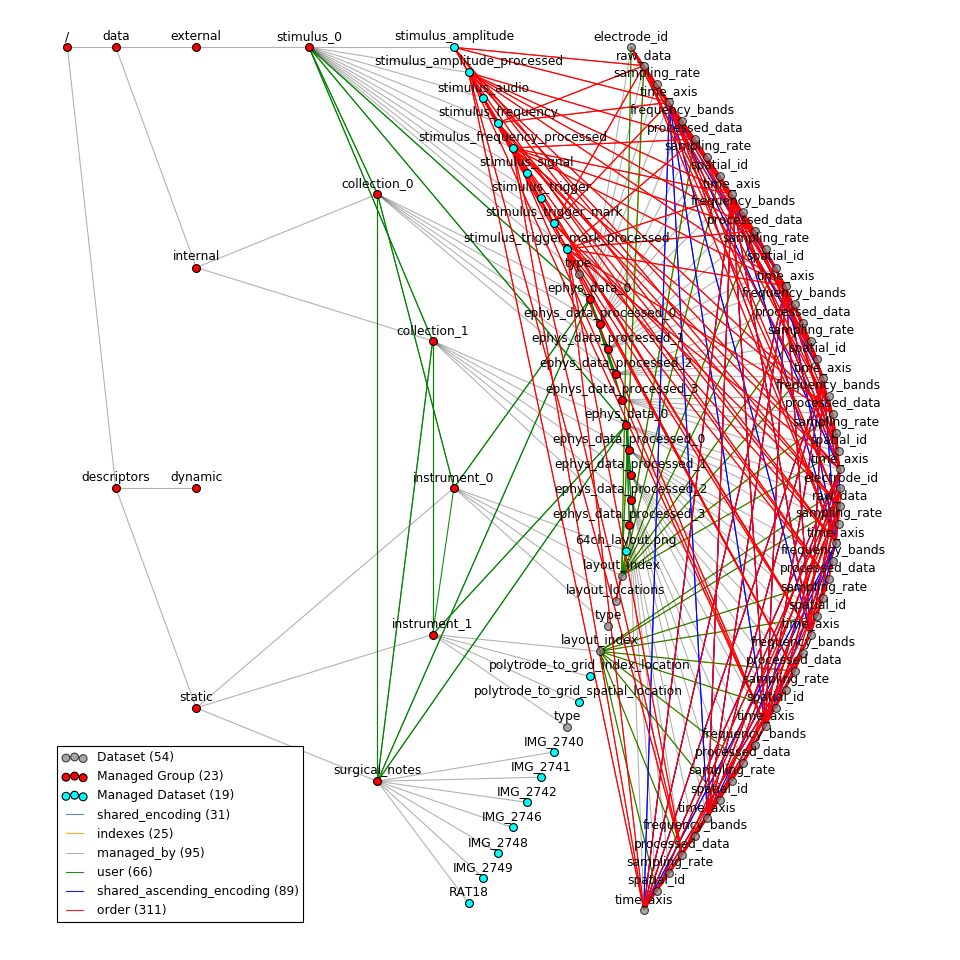

In [70]:
pos_hierarchy = {}
nodes_at_level = {i:0 for i in range(7)}
for v in allnodes:
    xpos = len(v.split('/')) if v != '/' else 1
    nodes_at_level[xpos] += 1

curr_nodes_at_level = {i:0 for i in range(7)}
for i, v in enumerate(np.sort(allnodes)):
    xpos = len(v.split('/')) if v != '/' else 1
    ypos = float(curr_nodes_at_level[xpos]) / nodes_at_level[xpos] 
    curr_nodes_at_level[xpos] += 1
    if xpos > 3:
        xpos += np.sin(ypos*np.pi)
    xpos = np.power(xpos,2)
    pos_hierarchy[v] = np.asarray([xpos,-ypos])
fig = draw_graph(G,
           pos_hierarchy, 
           show_labels=True, 
           node_size=50, 
           label_offset=(0, 0.012), 
           label_font_size=11,
           figsize=(12,12),
           ylim=(-1,0.03),
           xlim=(0,55),
           edgetypes=None,
           relationship_counts=relationship_counts)
if savefig_dir is not None:
    plt.savefig(os.path.join(savefig_dir, 'rat_data_file_hierarchy_with_relationships.pdf'))
mpl_stop_interact(fig)

## 4.5 Plot the file hierarchy with relationships: Alternative Layouts

### 4.5.1 Multi-level shell layout

This layout organizes the objects on a series of nested shells (i.e., circles). Each shell contains all objects at the given level (i.e., depth of the file hierarchy) with the exception of datasets, which are all aranged on the innermost shell to ease overview of groups and datasets and to improve the visualization of inter-dataset relationships). All datasets, hence, appear in a circle at the center of the plot surrounded by the groups at the various levels of the file hierarchy.

Multi-level shell layout without lables


<IPython.core.display.Javascript object>


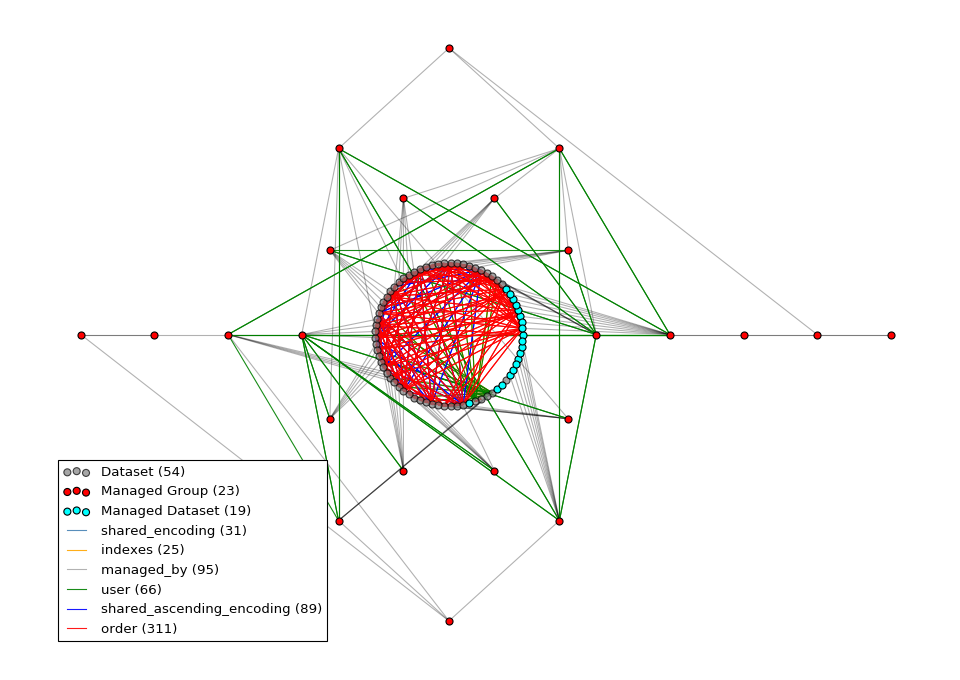

Mulit-level shell layout with labels (zoom-in)


<IPython.core.display.Javascript object>


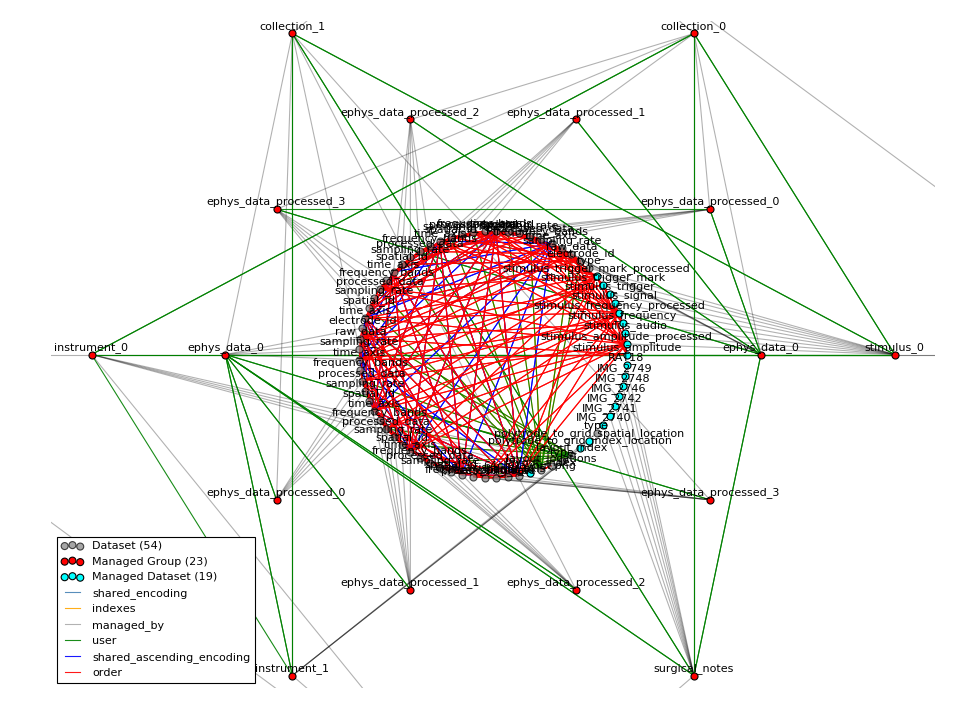

In [71]:
nodes_at_level = {i:[] for i in range(1,7)}
for v in allnodes:
    xpos = len(v.split('/'))  if v != '/' else 1
    if v in object_stats['datasets']:
        xpos = 6
    nodes_at_level[xpos].append(v)
pos_shell_hier = nx.shell_layout(G,nlist=nodes_at_level.values()[::-1])
print "Multi-level shell layout without lables"
fig = draw_graph(G,
                 pos_shell_hier, 
                 show_labels=False, 
                 node_size=40, 
                 figsize=(12,8.5),
                 xlim=(-0.9,1.1),
                 ylim=(-0.73, 0.73), 
                 label_font_size=12, 
                 relationship_counts=relationship_counts)
if savefig_dir is not None:
    plt.savefig(os.path.join(savefig_dir, 'rat_data_file_hierarchy_shell_layout.pdf'))
mpl_stop_interact(fig)
print "Mulit-level shell layout with labels (zoom-in)"
fig = draw_graph(G,
                 pos_shell_hier, 
                 show_labels=True,
                 node_size=40, 
                 figsize=(12,9), 
                 xlim=(-0.55,0.55), 
                 ylim=(-0.45, 0.45),
                 label_font_size=10,
                 label_offset=(0,0.01))
if savefig_dir is not None:
    plt.savefig(os.path.join(savefig_dir, 'rat_data_file_hierarchy_shell_layout_zoom_in.pdf'))
mpl_stop_interact(fig)

### 4.5.2 Spring layout using a single shell as initial positions

In [72]:
pos_shell  = nx.shell_layout(G)
pos_spring = nx.spring_layout(G,dim=2,k=None,
                                pos=pos_shell, # Set initial positions to get a more deterministic result
                                fixed=None,
                                iterations=10000,
                                weight=None,
                                scale=1.0)

Spring layout with labels


<IPython.core.display.Javascript object>


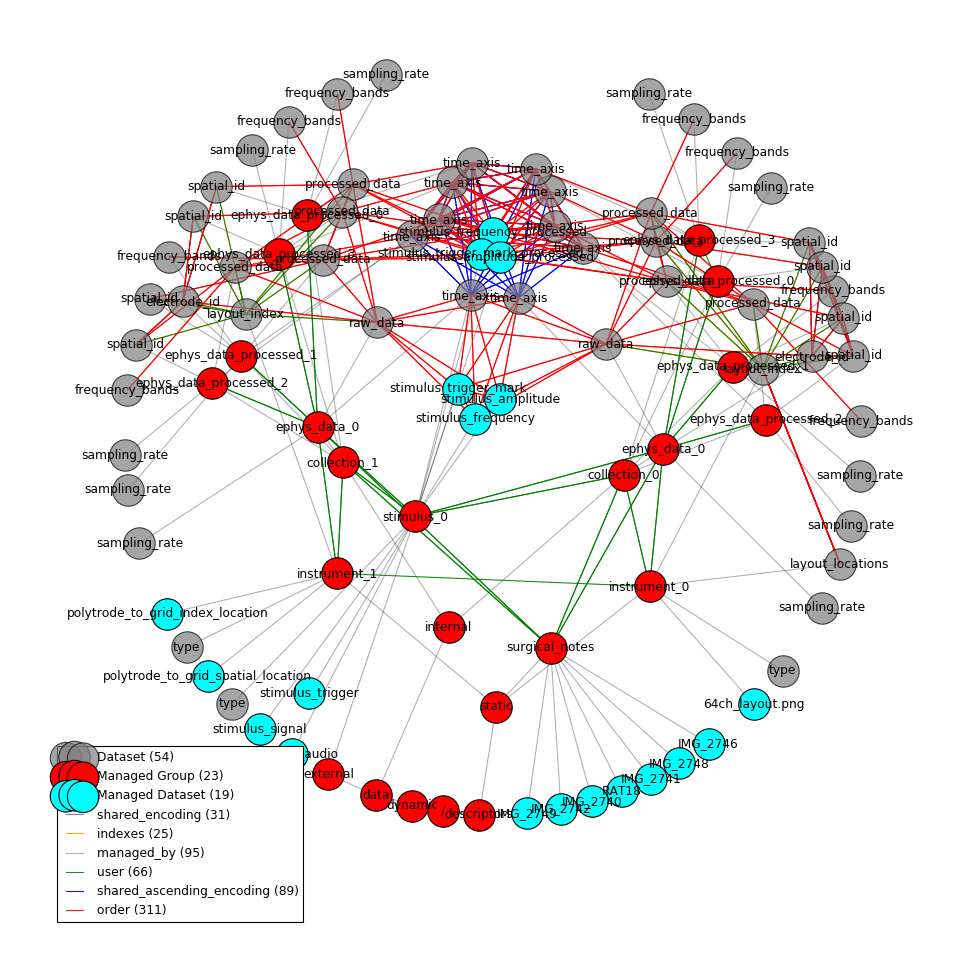

Spring layout without labels


<IPython.core.display.Javascript object>


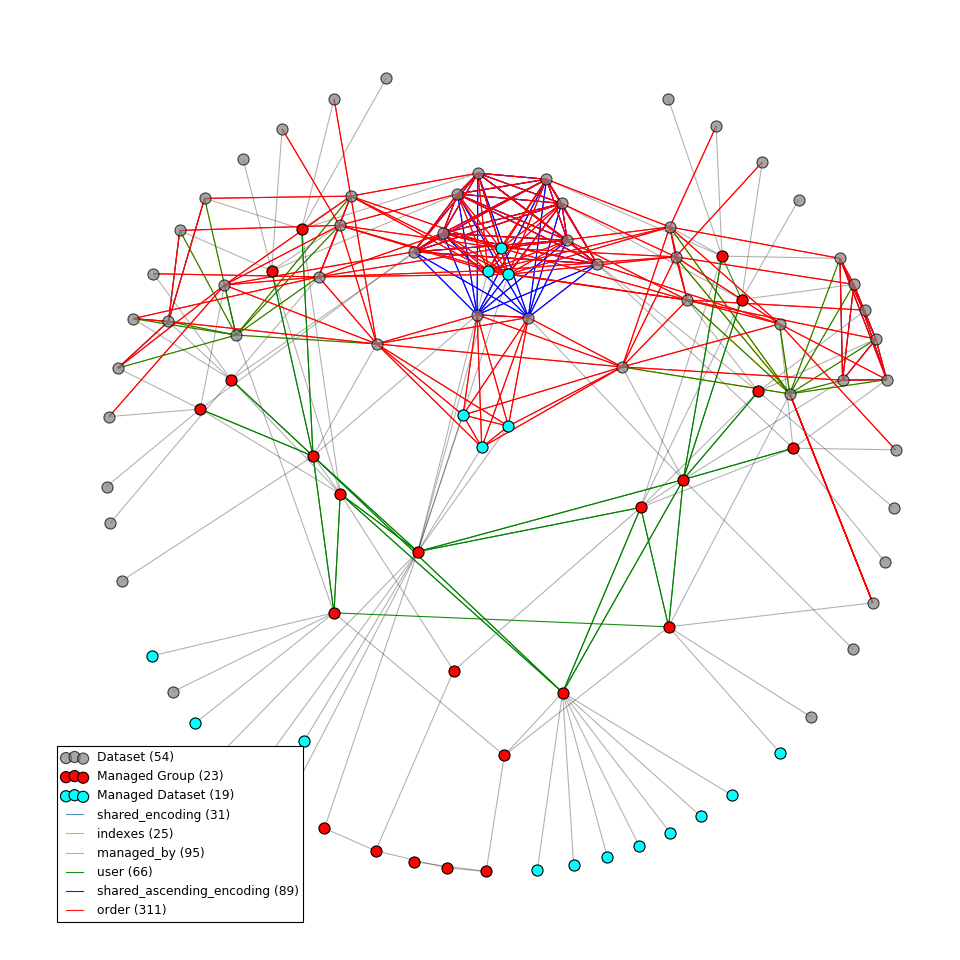

In [73]:
print "Spring layout with labels"
fig = draw_graph(G,pos_spring,
                 show_labels=True, 
                 node_size=800, 
                 xlim=(-0.1,1.1),
                 ylim=(-0.15, 1.05), 
                 label_font_size=11, 
                 relationship_counts=relationship_counts)
if savefig_dir is not None:
    plt.savefig(os.path.join(savefig_dir, 'rat_data_file_hierarchy_spring_layout.pdf'))
mpl_stop_interact(fig)

print "Spring layout without labels"
fig = draw_graph(G,
                 pos_spring, 
                 show_labels=False, 
                 node_size=100, 
                 xlim=(-0.07,1.05),
                 ylim=(-0.07, 1.05), 
                 label_font_size=11, 
                 relationship_counts=relationship_counts)
if savefig_dir is not None:
    plt.savefig(os.path.join(savefig_dir, 'rat_data_file_hierarchy_spring_layout_no_labels.pdf'))
mpl_stop_interact(fig)
#print "Shell layout without labels"
#draw_graph(G,pos_shell, False,100 , xlim=(-1.15,1.1), ylim=(-1.15,1.05), label_font_size=11)

# 5 Example Visualizations and Analyses

## 5.1 Multi time series plot: Raw voltage response, wavelet decomposed data, and MUA

Here we show for select electrode(s) and timeframe(s) time-series plot of:

1. the raw voltage recorded from the grid and polytrode at ~12.2KHz and
2. the high-gamma (median of the 65-170 Hz frequency range) from wavelet decomposed processed dataset at 400Hz 
2. the frequency of the events for the grid and polytrode stored at 400Hz

NOTE: the raw voltage recordings and events data, while alligned in time, are using different sampling rates.

In [74]:
# Selection settings
g_electrode_index = 0
p_electrode_index = 4
g_time_range = (1050000, 1059000)

### 5.1.1 Get the raw data objects

In [75]:
# Get the base data objects we need
ephys_collection = infile.data().internal().collection_data(0)
g_raw = ephys_collection.ephys_data(0)
g_raw_data = g_raw.ephys_data()
g_raw_time = g_raw['time_axis']
# MUA data
g_mua = ephys_collection.ephys_data_processed(2)
g_mua_time = g_mua['time_axis']
g_mua_data = g_mua.ephys_data()
# Wavlet data to compute high gamma
g_wvt = ephys_collection.ephys_data_processed(0)
g_wvt_time = g_wvt['time_axis']
g_wvt_data = g_wvt.ephys_data()
# Load the data for our time axes
g_raw_time_data = g_raw_time[...]  
g_mua_time_data = g_mua_time[...]
g_wvt_time_data = g_wvt_time[...]

### 5.1.2 Find the relationships to map between the datasets

Find relationships we can use to map between the different time axes of our raw and processed data

In [76]:
# Find the relationships between the time axis of the raw and the mua data
g_rels_time_raw_to_mua = RelationshipAttribute.find_relationships(source=g_raw_time,
                                                                  target=g_mua_time)
print "Found the following kind of relationships " + str([i.relationship_type for i in g_rels_time_raw_to_mua.values()])

Found the following kind of relationships [u'shared_ascending_encoding']


In [77]:
# Find the relationships between the time axis of the raw and the mua data
g_rels_time_raw_to_wvt = RelationshipAttribute.find_relationships(source=g_raw_time,
                                                                  target=g_wvt_time)
print "Found the following kind of relationships " + str([i.relationship_type for i in g_rels_time_raw_to_wvt.values()])

Found the following kind of relationships [u'shared_ascending_encoding']


We found a ```shared_ascending_endcoding``` relationships, i.e., the time axes between the raw and processed data are aligned but do not have the same values. This is because the processed data has been stored at a reduced sampling rate (400 Hz for the processed and ~12.2KHz for the raw data). We can now use the relationship we found to map indices and ranges between the two datasets.

In [78]:
g_raw_to_mua = g_rels_time_raw_to_mua.values()[0]
g_raw_to_wvt = g_rels_time_raw_to_wvt.values()[0]

Similarly, locate the relationships between our time axes and the corresponding raw data. As these will all be ```order``` relationships, the mapping simple in that we can apply the same selection to the source and the target.

In [79]:
g_raw_time_to_data = RelationshipAttribute.find_relationships(source=g_raw_time, target=g_raw_data).values()[0]
g_mua_time_to_data = RelationshipAttribute.find_relationships(source=g_mua_time, target=g_mua_data).values()[0]
g_wvt_time_to_data = RelationshipAttribute.find_relationships(source=g_wvt_time, target=g_wvt_data).values()[0]

Now we have all the information we need, i.e., we have:

1. The HDF5 datasets with our raw and processed data
2. The HDF5 datasets with time dimension scale for our raw and processed data
3. ```order``` relationships mapping the time dimensions back to the data
4. ```shared_ascending_encoding``` relationships mapping between our raw and processed time axes

### 5.1.3 Select the time range

First, we determin the index range in our raw time axis that we are interested in and create a corrresponding selection.

In [80]:
start_index = np.argmax(g_raw_time_data >= g_time_range[0])
stop_index = np.argmin(g_raw_time_data  <= g_time_range[1])
g_raw_time_select = slice(start_index, stop_index)   # Selection to retrieve the time values for our raw data

Second, we use the relationships we have found to map the time range to our other datasets simply by slicing into our relationship.

In [81]:
# Map the selection from the raw to the processed time axes
g_mua_time_select = g_raw_to_mua[g_raw_time_select]     # Selection to retrieve the time values for the mua data
g_wvt_time_select = g_raw_to_wvt[g_raw_time_select]     # Selection to retrieve the time values for the wvt data

# Map the selection from the time axes to the actual data
g_raw_select = g_raw_time_to_data[g_raw_time_select]    # Selection to retrieve the voltage data for our raw data
g_mua_select = g_mua_time_to_data[g_mua_time_select]    # Selection to retrieve the actual values for our mua data
g_wvt_select = g_wvt_time_to_data[g_mua_time_select]    # Selection to retrieve the actual values for our wvt data

### 5.1.4 Validate the time ranage selection 
Now lets see how our selections look like:

In [82]:
print "Select raw time: %i: %i" % (g_raw_time_select.start, g_raw_time_select.stop)
print "Select raw data: %i: %i" % (g_raw_select.start, g_raw_select.stop)
print "Select MUA time: %i: %i" % (g_mua_time_select.start, g_mua_time_select.stop)
print "Select MUA data: %i: %i" % (g_mua_select.start, g_mua_select.stop)
print "Select WVT time: %i: %i" % (g_wvt_time_select.start, g_wvt_time_select.stop)
print "Select WVT data: %i: %i" % (g_wvt_select.start, g_wvt_select.stop)

Select raw time: 12817383: 12927247
Select raw data: 12817383: 12927247
Select MUA time: 420001: 423600
Select MUA data: 420001: 423600
Select WVT time: 420001: 423600
Select WVT data: 420001: 423600


In [83]:
print "Time range selected in the raw data    : %f to %f ms" % (g_raw_time_data[g_raw_time_select.start], 
                                                                g_raw_time_data[g_raw_time_select.stop]) 
print ""
print "Time range selected in the MUA data    : %f to %f ms" % (g_mua_time_data[g_mua_time_select.start], 
                                                                g_mua_time_data[g_mua_time_select.stop]) 
print "Next larger time frame for the MUA data: %f to %f ms" % (g_mua_time_data[g_mua_time_select.start-1], 
                                                                g_mua_time_data[g_mua_time_select.stop+1]) 
print ""
print "Time range selected in the WVt data    : %f to %f ms" % (g_wvt_time_data[g_wvt_time_select.start], 
                                                                g_wvt_time_data[g_wvt_time_select.stop]) 
print "Next larger time frame for the WVT data: %f to %f ms" % (g_wvt_time_data[g_wvt_time_select.start-1], 
                                                                g_wvt_time_data[g_wvt_time_select.stop+1]) 

Time range selected in the raw data    : 1050000.011059 to 1059000.069902 ms

Time range selected in the MUA data    : 1050002.500000 to 1059000.000000 ms
Next larger time frame for the MUA data: 1050000.000000 to 1059002.500000 ms

Time range selected in the WVt data    : 1050002.500000 to 1059000.000000 ms
Next larger time frame for the WVT data: 1050000.000000 to 1059002.500000 ms


As expected, our mapping of the time range from the raw to the processed data has resulted in the selection of the largest possible time range that is still contained within the time range given by our raw time data, i.e., the time frame we selected for the MUA data is fully contained within the raw time range, but once we expand the range for the MUA data by just 1 index, the time range is outside our limits.

### 5.1.5 Define and map electrode selection
Now we'll do the same steps for the electrodes to the select the data we need there

In [84]:
# Select the electrode based on the electrode index
g_raw_electrode = g_raw['electrode_id']
g_raw_electrode_data = g_raw_electrode[...]
g_raw_electrode_select = np.flatnonzero(g_raw_electrode_data == g_electrode_index)

# Map the electrode index selection to raw data
electrodes_to_raw = RelationshipAttribute.find_relationships(source=g_raw_electrode, target=g_raw_data).values()[0]
g_raw_select_elec = electrodes_to_raw[g_raw_electrode_select]

# Map the selection from the raw to the MUA data
raw_to_mua = RelationshipAttribute.find_relationships(source=g_raw_data, target=g_mua_data).values()[0]
g_mua_select_elec = raw_to_mua[g_raw_select_elec]

# Map the selection from the raw to the WVY data
raw_to_wvt = RelationshipAttribute.find_relationships(source=g_raw_data, target=g_wvt_data).values()[0]
g_wvt_select_elec = raw_to_wvt[g_raw_select_elec]

print "Select electrode %i in raw data via %s" % (g_electrode_index, g_raw_select_elec)
print "Select electrode %i in MUA data via %s" % (g_electrode_index, g_mua_select_elec)
print "Select electrode %i in WVT data via %s" % (g_electrode_index, g_wvt_select_elec)

Select electrode 0 in raw data via [0]
Select electrode 0 in MUA data via [0]
Select electrode 0 in WVT data via [0]


### 5.1.6 Select the same data also for the polytrode

In [85]:
# Get polytrode data objects
ephys_collection = infile.data().internal().collection_data(1)
p_raw = ephys_collection.ephys_data(0)
p_raw_data = p_raw.ephys_data()
p_raw_time = p_raw['time_axis']
p_raw_time_data = p_raw_time[...]
p_mua = ephys_collection.ephys_data_processed(2)
p_mua_time = p_mua['time_axis']
p_mua_data = p_mua.ephys_data()
p_mua_time_data = p_mua_time[...]
p_wvt = ephys_collection.ephys_data_processed(0)
p_wvt_time = p_wvt['time_axis']
p_wvt_data = p_wvt.ephys_data()
p_wvt_time_data = p_wvt_time[...]

# Get the relationships to map our time selection
g_time_to_p_time = RelationshipAttribute.find_relationships(source=g_raw_time, target=p_raw_data).values()[0]
p_raw_to_mua = RelationshipAttribute.find_relationships(source=p_raw_time, target=p_mua_time).values()[0]
p_raw_to_wvt = RelationshipAttribute.find_relationships(source=p_raw_time, target=p_wvt_time).values()[0]
p_raw_time_to_data = RelationshipAttribute.find_relationships(source=g_raw_time, target=g_raw_data).values()[0]
p_mua_time_to_data = RelationshipAttribute.find_relationships(source=g_mua_time, target=g_mua_data).values()[0]
p_wvt_time_to_data = RelationshipAttribute.find_relationships(source=g_wvt_time, target=g_wvt_data).values()[0]

# Map the time selection to the polytrode data
p_raw_time_select = g_time_to_p_time[g_raw_time_select]
p_mua_time_select = p_raw_to_mua[p_raw_time_select]  
p_wvt_time_select = p_raw_to_wvt[p_raw_time_select] 
p_raw_select = p_raw_time_to_data[p_raw_time_select]    
p_mua_select = p_mua_time_to_data[p_mua_time_select]   
p_wvt_select = p_wvt_time_to_data[p_wvt_time_select]  

In [86]:
# NOTE: As the polytrode is a completely different instrument, there is no direct mapping 
# between electrodes. 
p_raw_electrode = p_raw['electrode_id']
p_raw_electrode_data = p_raw_electrode[...]
p_raw_electrode_select = np.flatnonzero(p_raw_electrode_data == p_electrode_index)

# Map the electrode index selection to raw data
p_electrodes_to_raw = RelationshipAttribute.find_relationships(source=p_raw_electrode, target=p_raw_data).values()[0]
p_raw_select_elec = electrodes_to_raw[p_raw_electrode_select]

# Map the selection from the raw to the MUA data
p_raw_to_mua = RelationshipAttribute.find_relationships(source=p_raw_data, target=p_mua_data).values()[0]
p_mua_select_elec = p_raw_to_mua[p_raw_select_elec]

# Map the selection from the raw to the WVT data
p_raw_to_wvt = RelationshipAttribute.find_relationships(source=p_raw_data, target=p_wvt_data).values()[0]
p_wvt_select_elec = p_raw_to_wvt[p_raw_select_elec]

### 5.1.5 Load and plot the data

In [87]:
# Load the raw grid data
plot_data_g_raw_time = g_raw_time_data[g_raw_time_select]
plot_data_g_raw      = g_raw_data[g_raw_select_elec, g_raw_select]

# Load the raw polytrode data
plot_data_p_raw_time = p_raw_time_data[p_raw_time_select]
plot_data_p_raw      = p_raw_data[p_raw_select_elec, p_raw_select]

# Load the MUA grid data
plot_data_p_mua_time = p_mua_time_data[p_mua_time_select]
plot_data_p_mua      = p_mua_data[p_mua_select_elec, p_mua_select]

# Load the MUA polytrode data
plot_data_g_mua_time = g_mua_time_data[g_mua_time_select]
plot_data_g_mua      = g_mua_data[g_mua_select_elec, g_mua_select]

In [88]:
# Load the Wavelet transformed data. For plotting we are interested in the high-gamma 65 - 170Hz
# frequency bands. In addition to the selection for the electrode and time dimensions we need to define 
# a selection for the frequency bands as well, and then compute the median Voltage from those bands for plotting
plot_data_p_wvt_time = p_wvt_time_data[p_wvt_time_select]
p_wvt_bands = p_wvt['frequency_bands']  # The frequency bands
p_wvt_bands_data = p_wvt_bands[...]
freq_min = 65 # 20
freq_max = 170 # 50
p_wvt_bands_select = np.flatnonzero(np.logical_and(p_wvt_bands_data >= freq_min, 
                                                   p_wvt_bands_data <= freq_max))

# Map the wvt_bands selection to the actual wvt data
p_bands_to_wvt = RelationshipAttribute.find_relationships(source=p_wvt_bands, target=p_wvt_data).values()[0]
p_wvt_select_bands = p_bands_to_wvt[p_wvt_bands_select]

# Load the data for the electrode, timeframe, and selected frequency bands
# Apply the slection in stages because h5py currently does not sumpport muliple index lists, so we load
# all data for the electrode first and then subset in tam and by frequency bands
plot_data_p_wvt = p_wvt_data[p_wvt_select_elec, ...][p_wvt_select, p_wvt_select_bands]

# Compute the median Voltage response across the frequency bands for the high gamma plot
plot_data_p_wvt = np.median(plot_data_p_wvt, axis=1)

# Load the high gamma wavelet data also for the grid instrument data using the same steps as for the polytrode
plot_data_g_wvt_time = g_wvt_time_data[g_wvt_time_select]
g_wvt_bands = g_wvt['frequency_bands']  
g_wvt_bands_data = g_wvt_bands[...]
g_wvt_bands_select = np.flatnonzero(np.logical_and(g_wvt_bands_data >= 65, g_wvt_bands_data <= 170))
g_bands_to_wvt = RelationshipAttribute.find_relationships(source=g_wvt_bands, target=g_wvt_data).values()[0]
g_wvt_select_bands = g_bands_to_wvt[g_wvt_bands_select]
plot_data_g_wvt = g_wvt_data[g_wvt_select_elec, ...][g_wvt_select, g_wvt_select_bands]
plot_data_g_wvt = np.median(plot_data_g_wvt, axis=1) 

<IPython.core.display.Javascript object>


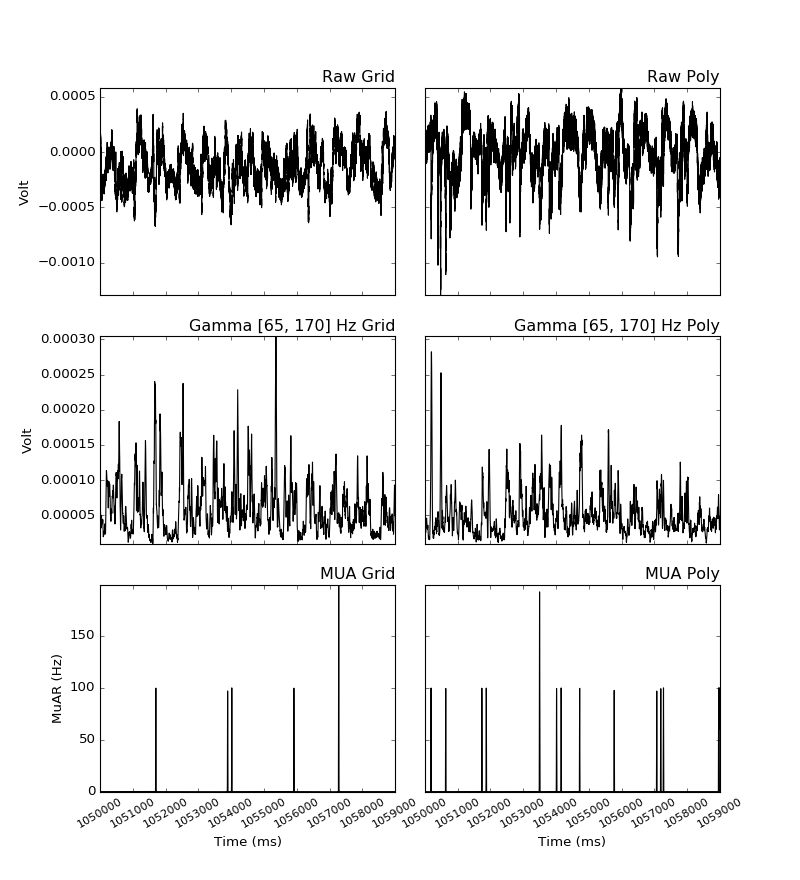

In [89]:
# Plot the data
fig, ax = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10,11))

# Compute the limits of the plots
xlim_grid = (np.min([plot_data_g_raw_time.min(), plot_data_g_mua_time.min(), plot_data_g_wvt_time.min()]), 
             np.max([plot_data_g_raw_time.max(), plot_data_g_mua_time.max(), plot_data_g_wvt_time.max()]))
xlim_poly = (np.min([plot_data_p_raw_time.min(), plot_data_p_mua_time.min(), plot_data_p_wvt_time.min()]), 
             np.max([plot_data_p_raw_time.max(), plot_data_p_mua_time.max(), plot_data_p_wvt_time.max()]))
ylim_raw =  (np.min([plot_data_g_raw.min(), plot_data_p_raw.min()]), 
             np.max([plot_data_g_raw.max(), plot_data_p_raw.max()]))
ylim_mua =  (np.min([plot_data_g_mua.min(), plot_data_p_mua.min()]), 
             np.max([plot_data_g_mua.max(), plot_data_p_mua.max()]))
ylim_wvt =  (np.min([plot_data_g_wvt.min(), plot_data_p_wvt.min()]), 
             np.max([plot_data_g_wvt.max(), plot_data_p_wvt.max()]))

# Grid raw data
ax[0][0].plot(plot_data_g_raw_time, plot_data_g_raw, color='black')
ax[0][0].set_ylabel('Volt')
ax[0][0].set_title('Raw Grid', loc='right')
ax[0][0].ticklabel_format(useOffset=False)
ax[0][0].set_xlim(xlim_grid)
ax[0][0].set_ylim(ylim_raw)
# Grid wvt data
ax[1][0].plot(plot_data_g_wvt_time, plot_data_g_wvt, color='black')
ax[1][0].set_ylabel('Volt')
ax[1][0].set_title('Gamma [%s, %s] Hz Grid' % (freq_min, freq_max), loc='right')
ax[1][0].ticklabel_format(useOffset=False)
ax[1][0].set_xlim(xlim_grid)
ax[1][0].set_ylim(ylim_raw)
# Grid MUA data
ax[2][0].plot(plot_data_g_mua_time, plot_data_g_mua, color='black')
ax[2][0].set_title('MUA Grid', loc='right')
ax[2][0].set_ylabel('MuAR (Hz)')
ax[2][0].set_xlabel('Time (ms)')
ax[2][0].set_xlim(xlim_grid)
ax[2][0].set_ylim(ylim_wvt)
ax[2][0].ticklabel_format(useOffset=False)
labels = ax[2][0].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

# Poly raw data
ax[0][1].plot(plot_data_p_raw_time, plot_data_p_raw, color='black')
ax[0][1].set_title('Raw Poly', loc='right')
ax[0][1].ticklabel_format(useOffset=False)
ax[0][1].set_xlim(xlim_poly)
ax[0][1].set_ylim(ylim_raw)
# Poly wvt data
ax[1][1].plot(plot_data_p_wvt_time, plot_data_p_wvt, color='black')
ax[1][1].set_title('Gamma [%s, %s] Hz Poly' % (freq_min, freq_max), loc='right')
ax[1][1].ticklabel_format(useOffset=False)
ax[1][1].set_xlim(xlim_poly)
ax[1][1].set_ylim(ylim_wvt)
# Poly MUA data
ax[2][1].plot(plot_data_p_mua_time, plot_data_p_mua, color='black')
ax[2][1].set_title('MUA Poly', loc='right')
ax[2][1].set_xlabel('Time (ms)')
ax[2][1].set_xlim(xlim_poly)
ax[2][1].set_ylim(ylim_mua)
ax[2][1].ticklabel_format(useOffset=False)
labels = ax[2][1].get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

# Adjust subfigure spacing
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.1)
plt.show()

if savefig_dir is not None:
    plt.savefig(os.path.join(savefig_dir, 'rat_data_mutli_data_time_series_frequ_%s_to_%sHz.pdf' % (freq_min, freq_max)))
mpl_stop_interact(fig)

## 5.2 Average response to amplitute-frequency tone stimulus 

Here we compute for all electrodes their average resonse when subjected to a particular tone stimulus within a given amplitude- and frequency range.

### 5.2.1 Determin the bin boundaries for the stimulus amplitude and frequency

In [90]:
# Get the stimulus data object
stimulus_data = infile.data().external().stimulus_data()
# Load the stimulus amplitude data
stimulus_amplitude = stimulus_data['stimulus_amplitude_processed']
stimulus_amplitude_data = stimulus_amplitude[...]

# Load the corresponding frequency data
stimulus_frequency = stimulus_data['stimulus_frequency_processed']
# Get the relationship to map the stimulus amplitude to the frequency. This is an 'order' relationship, i.e.,
# selection map directly between the two object, but using the relationship formalizes the mapping
stim_amp_to_frequ = RelationshipAttribute.find_relationships(source=stimulus_amplitude, 
                                                             target=stimulus_frequency).values()[0]
stimulus_frequency_data = stimulus_frequency[stim_amp_to_frequ[...]]

In [91]:
# Get the set of values that are not NAN. NAN values are used during periods where no stimulus is present
valid_stimulus_values = np.flatnonzero(np.isfinite(stimulus_amplitude_data))

In [92]:
# Instead of using all values during a stimulus we may choose to use only a subset of values
# during a stimulus by selecting a start_offset (in number of timesteps) and the select_num_step duration
# in number of timesteps we want to keep
start_offset = 5
select_num_steps = 5
if start_offset != 0 and select_num_steps is None:
    raise ValueError("Selecting a start offset is only allowed in combination with select_num_steps!=None")
# Instead of selecting all non-NAN values select a user-defined range of values during the stimulus
if select_num_steps is not None:
    # Get the trigger marker. The trigger mark array is 1 when a stimulus starts and NAN otherwise
    trigger_mark_proc = stimulus_data['stimulus_trigger_mark_processed']
    trigger_mark_proc_data = np.flatnonzero(np.isfinite(trigger_mark_proc[...])) 
    # Get the relationship between the 
    stim_trigger_mark_to_amp = RelationshipAttribute.find_relationships(source=trigger_mark_proc, 
                                                                        target=stimulus_amplitude).values()[0]
    # Map the trigger markers to the stimulus amplitude data
    amp_trigger_mark = stim_trigger_mark_to_amp[trigger_mark_proc_data]
    
    # Now define the values we want to select
    amp_trigger_mark += start_offset  # Shift the data by the start_offset
    # Now iterate over the number of steps we want to select and define the array
    valid_stimulus_values = np.copy(amp_trigger_mark)
    for i in range(1, select_num_steps):
        valid_stimulus_values = np.append(valid_stimulus_values, (amp_trigger_mark+i))
    valid_stimulus_values = np.sort(valid_stimulus_values)

In [93]:
# Extract the "valid" amplitude and frequncy data values, i.e., those values we want to compute the mean
# voltage response from
stimulus_amplitude_data_valid = stimulus_amplitude_data[valid_stimulus_values]
stimulus_frequency_data_valid = stimulus_frequency_data[stim_amp_to_frequ[valid_stimulus_values]]

In [94]:
# Determine the bin boundaries for the histogramgs
frequency_bins = np.append(-0.5 , np.unique(stimulus_frequency_data[valid_stimulus_values]) + 0.5)
amplitude_bins = np.append(np.unique(stimulus_amplitude_data[valid_stimulus_values]) - 0.5 , 0.5)

<IPython.core.display.Javascript object>


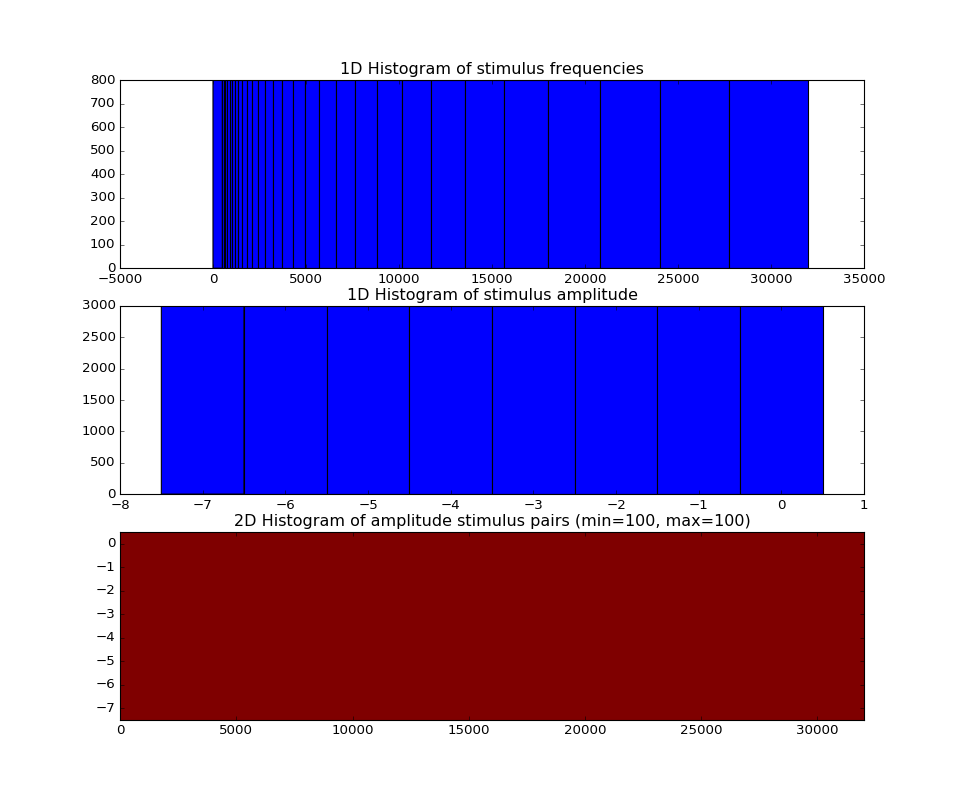

In [95]:
# Validate the bin boundaries we are using
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, figsize=(12,10))
# Histogram of frequency stimulus data
ax1.hist(stimulus_frequency_data[valid_stimulus_values], bins=frequency_bins)
ax1.ticklabel_format(useOffset=False)
ax1.set_title('1D Histogram of stimulus frequencies')
# Histogram of stimulus amplitude data
ax2.hist(stimulus_amplitude_data[valid_stimulus_values], bins=amplitude_bins)
ax2.ticklabel_format(useOffset=False)
ax2.set_title('1D Histogram of stimulus amplitude')
# 2D Histogram of stimulus amplitude/frequency data
temp = ax3.hist2d(stimulus_frequency_data[valid_stimulus_values], 
                  stimulus_amplitude_data[valid_stimulus_values],
                  bins=(frequency_bins, amplitude_bins),
                  vmin=0)
ax3.set_title('2D Histogram of amplitude stimulus pairs (min=%i, max=%i)' % (temp[0].min(), temp[0].max()))
plt.show()
mpl_stop_interact(fig)

As all amplitude/frequency stimulus pairs are presented the same number of times, we expect the histograms to be  flat, confirming that we are using approbriate bin boundaries to capture the different amplitude/frequency stimuli. 

### 5.2.2 Get the voltage data and needed relationships

In [96]:
# Get the raw data
ephys_collection = infile.data().internal().collection_data(0)
g_proc = ephys_collection.ephys_data_processed(0)
g_proc_data = g_proc.ephys_data()

In [97]:
# Define the frequency bands we want to select
g_frequ_bands = g_proc['frequency_bands']
g_frequ_bands_data = g_frequ_bands[...]
freq_min = 20
freq_max = 50
g_frequ_select = np.flatnonzero(np.logical_and(g_frequ_bands_data >= freq_min, 
                                               g_frequ_bands_data <= freq_max))

# Get the map between the frequency data and the actual processed data and map the selection 
g_frequ_to_data = RelationshipAttribute.find_relationships(source=g_frequ_bands,
                                                           target=g_proc_data).values()[0]
g_proc_select_bands = g_frequ_to_data[g_frequ_select]

In [98]:
# Get the layout of the electrodes
g_layout_index = infile.descriptors().static().instrument_data(0)['layout_index']
g_layout_index_to_proc = RelationshipAttribute.find_relationships(source=g_layout_index,
                                                                  target=g_proc_data).values()[0]
# Compute the index of the electrodes we  need to select for each of the locations
# simply by slicing into our relationship. Since this is an indexes relationship, in this particular case
# the result of the mapping with g_layout_index_to_raw[...] is the same as g_layout_index[...]
g_layout_index_map = g_layout_index_to_proc[...]  #

print "The layout " +  g_layout_index_to_proc.relationship_type + " axis " + \
       str(g_layout_index_to_proc.target_axis) + " of the raw voltage data"

The layout indexes axis 0 of the raw voltage data


In [99]:
# Determine the relationbship between the amplitude data and the raw voltage recordings. We used the
# amplitude data above to also map to the frequency data. By using the same reference here, we ensure
# that we in fact select the correct corresponding data. 
amp_to_g_proc_data = RelationshipAttribute.find_relationships(source=stimulus_amplitude, 
                                                              target=g_proc_data).values()[0]
# The following shows that this is in fact an order relationship along the time axis as we need it
print amp_to_g_proc_data.relationship_spec.to_json(pretty=True)

{
    "attribute": "order_/data/external/stimulus_0/stimulus_amplitude_processed_/data/internal/collection_0/ephys_data_processed_0/processed_data",
    "axis": 0,
    "description": "None (dimensions scale relationship)",
    "optional": false,
    "prefix": null,
    "properties": null,
    "relationship_type": "order",
    "target": {
        "axis": 1,
        "dataset": "processed_data",
        "filename": null,
        "global_path": "/data/internal/collection_0/ephys_data_processed_0",
        "group": null,
        "prefix": null,
        "prefix_all": null
    }
}


### 5.2.3 Define helper functions for computing and plotting mean responses of electrodes for a lattice of bins amplitide/frequency ranges

In [100]:
def compute_mean_voltage_response(voltage_data,
                                  amplitude, 
                                  frequency, 
                                  amplitude_bins, 
                                  frequency_bins,
                                  squeeze=True):
    """
    Compute a 2D lattice of amplitude frequency bins and compute for each bin the
    mean voltage response in the raw data. 
    
    :param voltage_data: The aligned voltage recording data
    :param stimulus_amplitude: The aligned stimulus amplitude data
    :param stimulus_frquency: The aligned stimulus frequency data
    :param amplitude_bins: The binning to be used for the amplitude data
    :param frequency_bins: The binning to be used for the frequency data
    :param squeeze: Depending on how we apply the selection to weights, numpy may yield a 2D array of 
                    weights were the additional dimensions have a lenghts of 1. By setting squeeze to
                    True we will apply np.squeeze to fix this
    """
    bins = [frequency_bins, amplitude_bins]
    weighted_histogram_counts = np.histogram2d(x=frequency,
                                               y=amplitude,
                                               bins=bins,
                                               weights=voltage_data if not squeeze else np.squeeze(voltage_data))[0]
    histogram_counts = np.histogram2d(x=frequency,
                                      y=amplitude,
                                      bins=bins)[0]
    #non_zero_bins = histogram_counts > 0  # Avoid division by 0
    #voltage_means = np.zeros(shape=weighted_histogram_counts.shape, dtype=float)
    #voltage_means[non_zero_bins] = np.true_divide(weighted_histogram_counts[non_zero_bins],
    #                                              histogram_counts[non_zero_bins])
    voltage_means = np.true_divide(weighted_histogram_counts, histogram_counts)
    return voltage_means

In [101]:
def plot_electrode_mean_voltage_responses(electrode_layout_index_map,
                                          electrode_voltage_means,
                                          select=(slice(1,None), slice(None,None)),
                                          vmin=None,
                                          vmax=None,
                                          extent=(0.5, 32, -7, 0),
                                          cmap='inferno',
                                          interpolation='none',
                                          aspect=4.65,
                                          figsize=(12,12),
                                          xticks=None,
                                          yticks=None,
                                          elec_id_pos=(26,-1),
                                          show_color_bar=True,
                                          xlabel_pos=(0.5, 0.06),
                                          ylabel_pos=(0.06, 0.5),
                                          cbar_extend='both',
                                          cbar_title='Z-Score'):
    """
    Show a series of 2D lattice of amplitude frequency bins with the
    mean voltage response. The plots are aranged in order in which
    the electrodes appear in the instrument
    
    :param vmin: Percentile float in range of [0,100] to be used to independenlty normalize the colors in each plot
    :param vmax: Percentile float in range of [0,100] to be used to independenlty normalize the colors in each plot
    :param electrode_layout_index_map: 0-based index map indicating for each
             location the index of the electrode that belongs there.
    :param electrode_voltage_means: List of 2D arrays with the mean voltage response for each electrode
    :param select: Tuple of slice objects indicating for the frequency and amplitude bins, which
                   range of bins should be shown.
    :param cbar_extend: Add arrow to the color bar on 'neither' , 'min', 'max', or 'both'
    """
    nr, nc = electrode_layout_index_map.shape
    fig, ax = plt.subplots(nr, nc, sharex=True, sharey=True, figsize=figsize)
    # swap axes to match matplotlib
    for (x, y), elect_id in np.ndenumerate(electrode_layout_index_map): 
        temp_dat = electrode_voltage_means[elect_id][1:,:] 
        curr_vmin = vmin if vmin is None else np.percentile(temp_dat, vmin)
        curr_vmax = vmax if vmax is None else np.percentile(temp_dat, vmax)
        im = ax[x,y].imshow(temp_dat.T,
                            origin='lower',
                            interpolation=interpolation,
                            cmap=cmap,
                            vmin=curr_vmin,
                            vmax=curr_vmax,
                            extent=extent,
                            aspect=aspect)
        ax[x,y].text(elec_id_pos[0], elec_id_pos[1], str(elect_id), color='white')
        ax[x,y].set_xlim(0.5,32)
        #plt.tick_params(axis='x', which='both', bottom='off',  top='off', labelbottom='on') 
        if xticks is not None:
            plt.xticks(*xticks) #, rotation='vertical')
        if yticks is not None:
            plt.yticks(*yticks) #, rotation='vertical')
        ax[x,y].xaxis.set_ticks_position('none')
        ax[x,y].yaxis.set_ticks_position('none')
    
    fig.subplots_adjust(hspace=0.075)
    fig.subplots_adjust(wspace=0.075)
   
    # Add shared x and y axis label
    fig.text(xlabel_pos[0], xlabel_pos[1], 'Frequency (kHz)', ha='center')
    fig.text(ylabel_pos[0], ylabel_pos[1], 'Attenuation (dB)', va='center', rotation='vertical')
    
    # Add common color bar
    if show_color_bar:
        fig.subplots_adjust(top=0.86)
        #  [left, bottom, width, height] 
        cbar_ax = fig.add_axes([0.15, 0.92, 0.7, 0.025])
        cb = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend=cbar_extend, 
                          ticks=[curr_vmin, curr_vmax])
        
        cb.ax.set_xticklabels(['0%' if vmin is None else ('%i' % vmin + '%'), 
                               '100%' if vmin is None else ('%i' % vmax + '%'),])
        
        cb.ax.xaxis.set_ticks_position('bottom')
        cb.ax.xaxis.set_label_position('bottom')
        cb.ax.set_title(cbar_title)
        
        
        #cbar_ax.tick_params(axis='x',direction='in',labeltop='on', labelbottom='off')
    
    plt.show()
    return fig

### 5.2.4 Compute the mean response of the electrodes of the grid for each amplitide/frequency range

In [102]:
electrode_voltage_means = []
# Compute the mean voltage response for all electrodes
for elec in range(g_proc_data.shape[0]):
    # Load the approbirate voltage data for the current electrode and aligned with the amplitude data
    voltage_data = g_proc_data[elec, :, g_proc_select_bands] # Load data for the electrode and bands
    voltage_data = voltage_data[amp_to_g_proc_data[valid_stimulus_values], :] # Select the time values we want
    voltage_data = np.median(voltage_data, axis=1)
    voltage_data = zscore(voltage_data, axis=None) 
    # Compute the mean voltage response
    voltage_means = compute_mean_voltage_response(voltage_data=voltage_data,
                                                  amplitude=stimulus_amplitude_data_valid,
                                                  frequency=stimulus_frequency_data_valid,
                                                  amplitude_bins=amplitude_bins,
                                                  frequency_bins=frequency_bins)
    electrode_voltage_means.append(voltage_means)

Grid


<IPython.core.display.Javascript object>


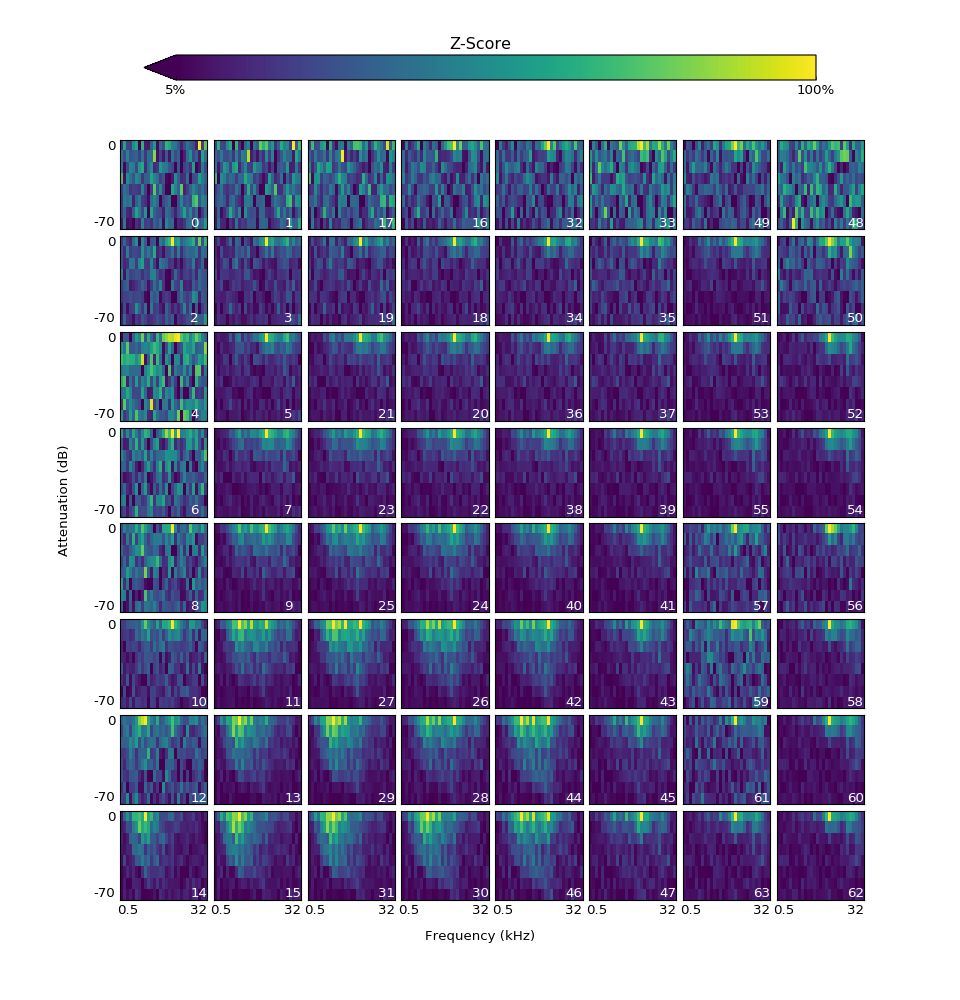

In [103]:
# Color bar settings
vmin=5
vmax=100
cbar_extend = 'neither' 
if vmin >0 and vmax < 100:
    cbar_extend = 'both'
elif vmin > 0:
    cbar_extend = 'min'
elif vmax < 100:
    cbar_extend = 'max'

# Plot the grid
print "Grid"
fig = plot_electrode_mean_voltage_responses(
    # Rotate columns for plotting purposes only to put the 0'th electrode in the top left
    electrode_layout_index_map=g_layout_index_map[:, ::-1].T, # rotate for plotting purposes
    electrode_voltage_means=electrode_voltage_means,
    select=(slice(1,None), slice(None,None)), # remove the (-0.5,0.5) frequency columns
    vmin=vmin,  # Ensure tha all use the same min value in the color map
    vmax=vmax,  # Ensure tha all use the same max value in the color map
    cmap='viridis', #'inferno',   
    figsize=(12,12.5),
    xticks=([3, 29], ['0.5', '32']),
    yticks=([-0.5, -6.5], ['0', '-70']),
    elec_id_pos=(26,-6.8),
    show_color_bar=True,
    aspect=4.65,
    cbar_extend=cbar_extend,
    interpolation='nearest'
    )

if savefig_dir is not None:
    plt.savefig(os.path.join(
            savefig_dir, 
            'rat_data_stim_resp_%s_to_%sHz_%svmin_grid_independend_colorscale_offset=%s_duration=%s.pdf' 
            % (freq_min, freq_max, vmin, start_offset, select_num_steps)))

mpl_stop_interact(fig)

### 5.2.5 Compute the same plot also for the polytrode

In [104]:
# Get the raw data
ephys_collection = infile.data().internal().collection_data(1)
p_proc = ephys_collection.ephys_data_processed(0)
p_proc_data = p_proc.ephys_data()

# Get the layout of the electrodes
p_layout_index = infile.descriptors().static().instrument_data(1)['layout_index']
p_layout_index_to_proc = RelationshipAttribute.find_relationships(source=p_layout_index,
                                                                  target=p_proc_data).values()[0]
# Compute the index of the electrodes weneed to select for each of the locations
p_layout_index_map = p_layout_index_to_proc[...]  #

# Determine the relationbship between the amplitude data and the processed voltage recordings. 
amp_to_p_proc_data = RelationshipAttribute.find_relationships(source=stimulus_amplitude, 
                                                              target=p_proc_data).values()[0]

# Define the frequency bands we want to select
p_frequ_bands = g_proc['frequency_bands']
p_frequ_bands_data = g_frequ_bands[...]
p_frequ_select = np.flatnonzero(np.logical_and(g_frequ_bands_data >= freq_min, 
                                               g_frequ_bands_data <= freq_max))
p_frequ_to_data = RelationshipAttribute.find_relationships(source=g_frequ_bands,
                                                           target=g_proc_data).values()[0]
p_proc_select_bands = p_frequ_to_data[g_frequ_select]

In [105]:
p_electrode_voltage_means = []
# Compute the mean voltage response for all electrodes
for elec in range(p_proc_data.shape[0]):
    # Load the approbirate voltage data for the current electrode and aligned with the amplitude data
    voltage_data = p_proc_data[elec, :, p_proc_select_bands] # Load data for the electrode and bands
    voltage_data = voltage_data[amp_to_p_proc_data[valid_stimulus_values], :] # Select the time values we want
    voltage_data = np.median(voltage_data, axis=1)
    voltage_data = zscore(voltage_data, axis=None) 
    # Compute the mean voltage response
    voltage_means = compute_mean_voltage_response(voltage_data=voltage_data,
                                                  amplitude=stimulus_amplitude_data_valid,
                                                  frequency=stimulus_frequency_data_valid,
                                                  amplitude_bins=amplitude_bins,
                                                  frequency_bins=frequency_bins)
    p_electrode_voltage_means.append(voltage_means)

Polytrode


<IPython.core.display.Javascript object>


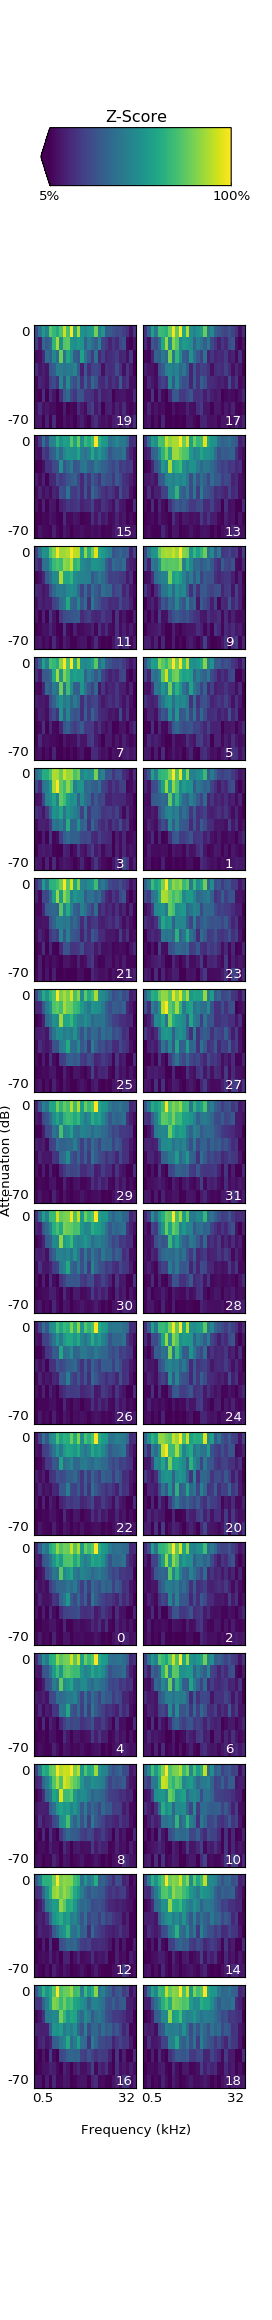

In [106]:
print "Polytrode"
fig = plot_electrode_mean_voltage_responses(
    electrode_layout_index_map=p_layout_index_map,
    electrode_voltage_means=p_electrode_voltage_means,
    select=(slice(1,None), slice(None,None)), # remove the (-0.5,0.5) frequency columns
    vmin=vmin,  # use the same vmin and vmax as for the gird plot
    vmax=vmax, 
    cmap='viridis', #'inferno',   
    figsize=(3.4, 29), # (3.90,33),
    xticks=([3, 29.5], ['0.5', '32']),
    yticks=([-0.5, -6.5], ['0', '-70']),
    elec_id_pos=(26,-6.8),
    show_color_bar=True,
    aspect=4.65,
    cbar_extend=cbar_extend,
    xlabel_pos=(0.5, 0.08),
    ylabel_pos=(0, 0.5),
    interpolation='nearest'
    )

if savefig_dir is not None:
    plt.savefig(os.path.join(
            savefig_dir, 
            'rat_data_stim_resp_%s_to_%sHz_%svmin_polytrode_independend_colorscale_offset=%s_duration=%s.pdf' % 
            (freq_min, freq_max, vmin, start_offset, select_num_steps)))

mpl_stop_interact(fig)